### Epithelial cell analysis

In [ ]:
### AT2 cell data was subset from the GEMM dataset for further analysis

In [1]:
import os
import glob
import scanpy as sc
import scanpy.external as sce
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from seaborn import despine
from seaborn import axes_style
import magic # imputation tool; van Dijk et al 2018 # 
from matplotlib.pyplot import suptitle
import matplotlib.colors
import pickle
import time
from matplotlib.ticker import FormatStrFormatter # manually set # y tick decimal places
import json
from matplotlib import rcParams

sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 7.2.0
backcall            0.1.0
cairo               1.19.1
cffi                1.14.0
colorama            0.4.5
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
decorator           4.4.2
deprecated          1.2.7
future              0.18.2
graphtools          1.5.0
h5py                3.7.0
igraph              0.8.2
ipykernel           5.2.0
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.16.0
joblib              0.14.1
kiwisolver          1.1.0
leidenalg           0.7.0
llvmlite            0.31.0
louvain             0.6.1
magic               2.0.3
matplotlib          3.5.2
mpl_toolkits        NA
natsort             7.0.1
numba               0.48.0
numexpr             2.7.1
numpy               1.22.4
packaging           20.3
pandas              1.5.3
parso               0.6.2
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit   

/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


#### Reload subset AT2 epithelial data from "gemm_dataset pre-processing.ipynb"

In [12]:
results_file = 'path/to/h5ad'
adata = sc.read(results_file)

##### Calculate PCA and HVG using epithelial cells only

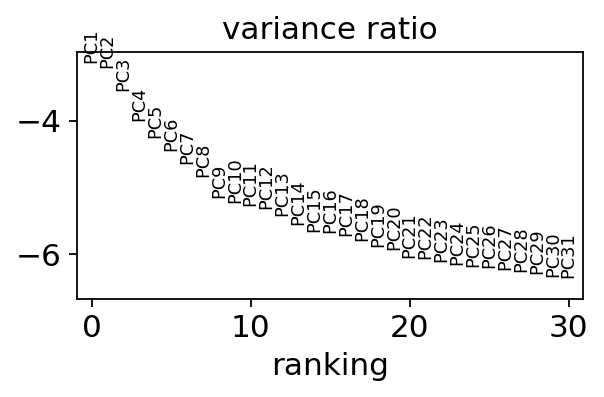

In [13]:
sc.tl.pca(adata, svd_solver='arpack') # svd_solver='arpack' is important for reproducibility

with axes_style({'axes.grid': False}):
    rcParams['figure.figsize']=4,2
    sc.pl.pca_variance_ratio(adata, log = True) 
    
# find highly variable genes for future clustering
sc.pp.highly_variable_genes(adata) 

Performing MAGIC
  Running MAGIC with `solver='exact'` on 17018-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/magic/utils.py:135: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(target_data, pd.SparseDataFrame):


  Running MAGIC with `solver='exact'` on 17018-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/magic/utils.py:135: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(target_data, pd.SparseDataFrame):


  Running MAGIC with `solver='exact'` on 17018-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/magic/utils.py:135: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(target_data, pd.SparseDataFrame):


Plotting data
Total run time (min): 0.49974815050760907


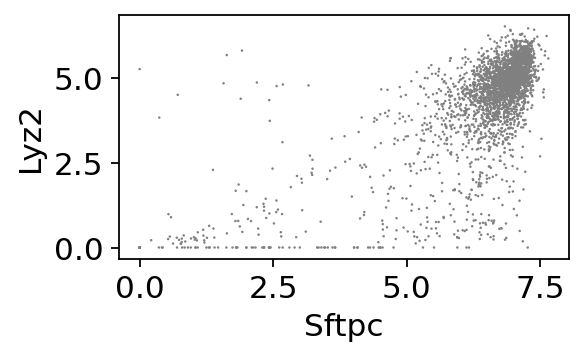

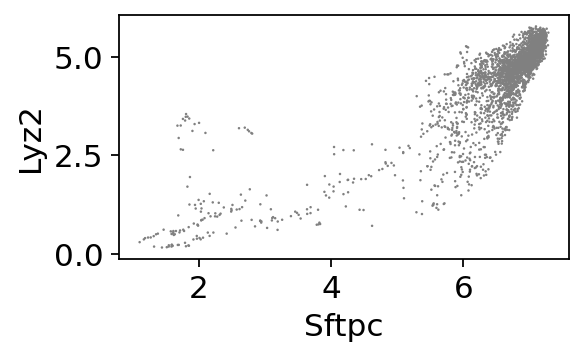

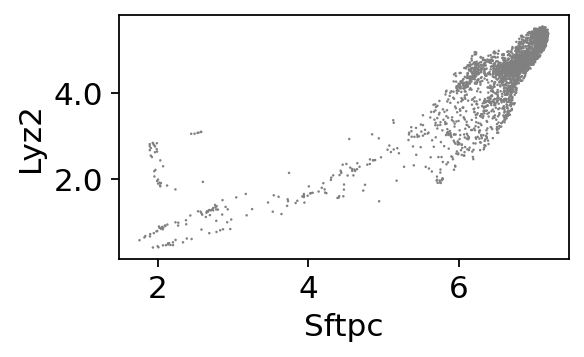

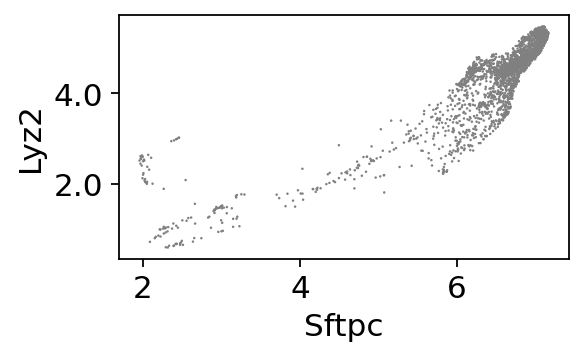

In [14]:
'''''''''
Visulize effect of imputation at different t values

'''''''''
sc.pp.filter_genes(adata, min_counts=1)

from matplotlib.ticker import FormatStrFormatter # manually set # y tick decimal places

start = time.time()

# seperate adatas
adata2 = adata.copy()
adata5 = adata.copy()
adata7 = adata.copy()

# impute
print('Performing MAGIC')
sce.pp.magic(adata2, name_list='all_genes', knn=5, t=2, n_pca=30)
sce.pp.magic(adata5, name_list='all_genes', knn=5, t=5, n_pca=30)
sce.pp.magic(adata7, name_list='all_genes', knn=5, t=7, n_pca=30)

# plot sftpc-lyz2 correlation after different imputation t values 
adata_list = [adata, adata2, adata5, adata7]
print('Plotting data')
    
for i in adata_list:
    with axes_style({'axes.grid': False}):
        ax = sc.pl.scatter(i, x='Sftpc', y='Lyz2', size=5, use_raw=False, show=False)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
end = time.time()
print('Total run time (min):', (end - start)/60)

No improvement after t=5. Perform MAGIC on core adata

In [15]:
sce.pp.magic(adata, name_list='all_genes', knn=5, t=5, n_pca=30)

  Running MAGIC with `solver='exact'` on 17018-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/magic/utils.py:135: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(target_data, pd.SparseDataFrame):


#### Calculate UMAP embedding

In [16]:
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=30)
sc.tl.umap(adata)

/home/alm72/.conda/envs/KPYtimecourse/lib/python3.8/site-packages/umap/spectral.py:227: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  warn(


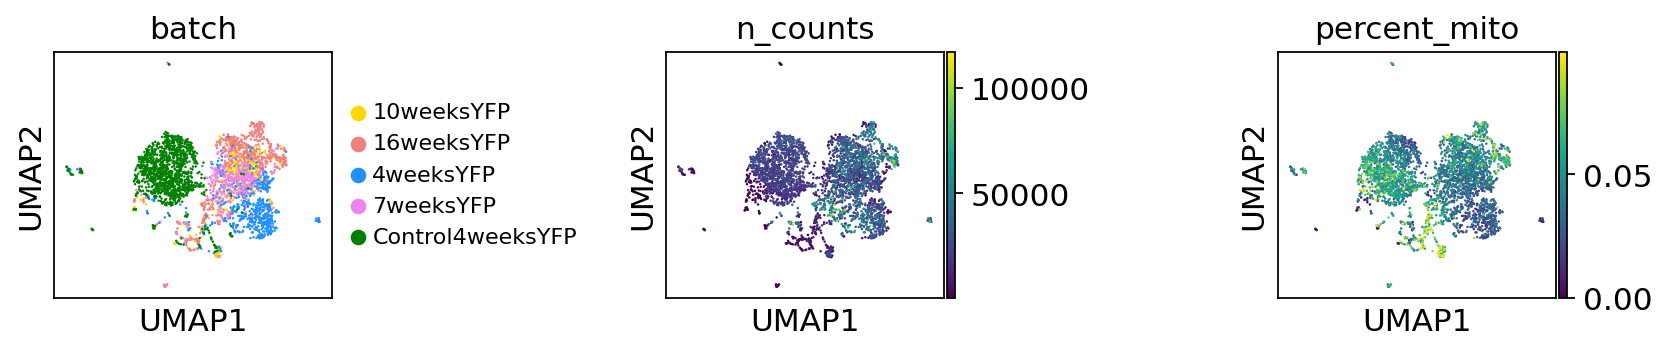

In [28]:
rcParams["figure.facecolor"]='white'
rcParams['figure.figsize']=2,2
sc.pl.umap(adata, projection='2d', color=['batch','n_counts','percent_mito'], color_map='viridis', wspace=1,
legend_fontsize=10, size=5, palette=['gold','lightcoral','dodgerblue','violet','green'])

#### Find Leiden communities

In [31]:
sc.tl.leiden(adata, resolution=0.05, key_added='leiden0_05')
sc.tl.leiden(adata, resolution=0.1, key_added='leiden0_1')
sc.tl.leiden(adata, resolution=0.2, key_added='leiden0_2')
sc.tl.leiden(adata, resolution=0.4, key_added='leiden0_4')

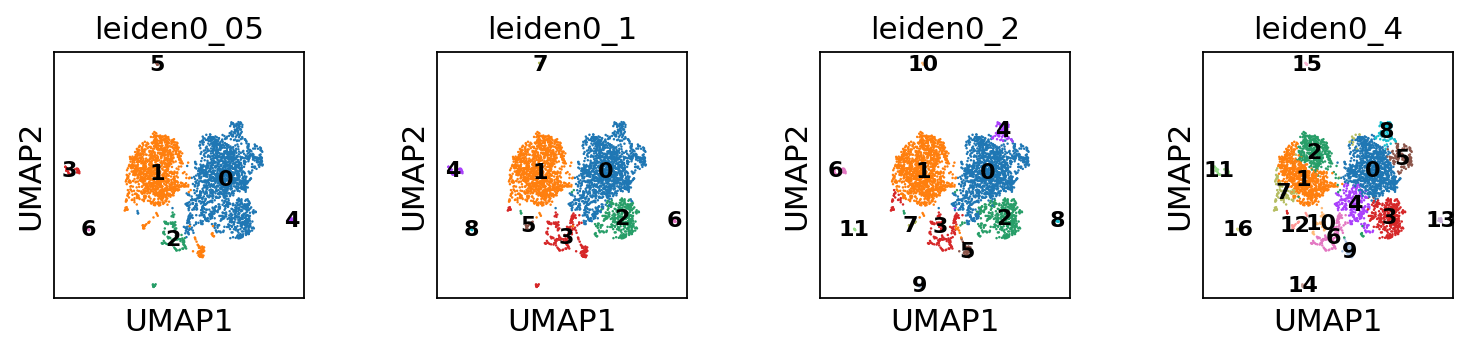

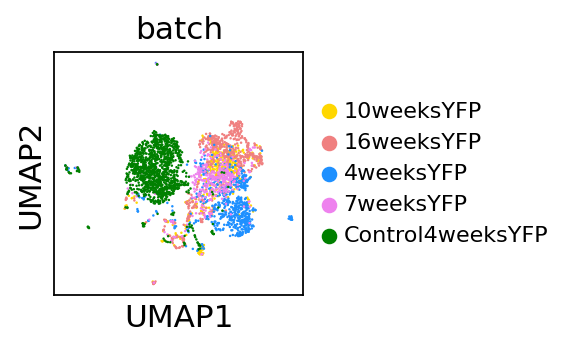

In [35]:
leiden_clusts=['leiden0_05','leiden0_1','leiden0_2','leiden0_4']

rcParams["figure.facecolor"]='white'
rcParams['figure.figsize'] = 2,2
sc.pl.umap(adata, color=leiden_clusts, hspace=0.5, legend_fontsize=10,legend_loc='on data', size=5, frameon=True, show=False)
sc.pl.umap(adata, color='batch', hspace=0.5, legend_fontsize=10,legend_loc='right margin', size=5, frameon=True, show=False) 

#### Subcluster leiden0_2 Cluster 0

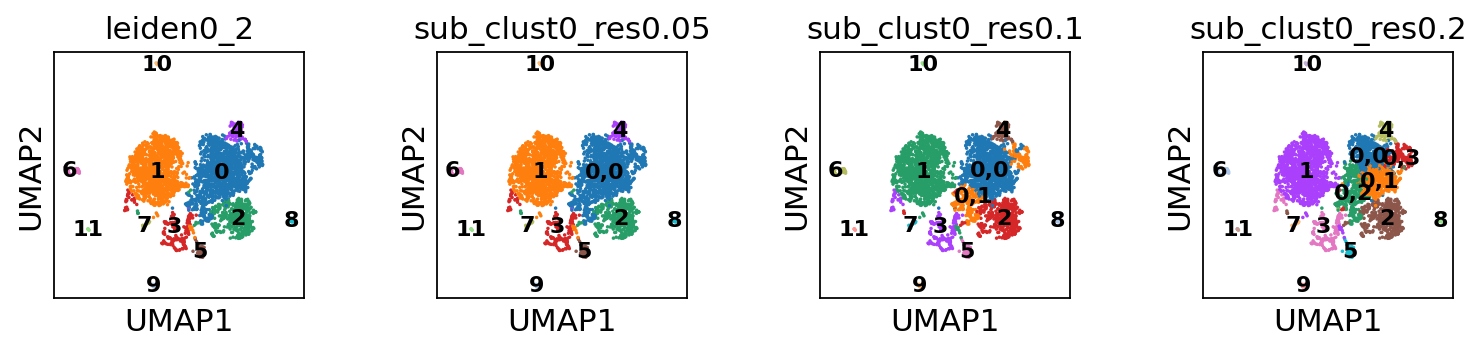

In [38]:
'''
Based on epithelial and mesenchymal signatures leiden0_2 is best except for cluster 4, which needs
to be seperated into two clusters - Wnt2 and MANC.

Subcluster cluster 0 in leiden 0.2.

'''
res_list = [0.05,0.1,0.2]
bdata=adata.copy()
for i in res_list:
    sc.tl.leiden(bdata, restrict_to=('leiden0_2', ['0']), resolution=i, 
                  key_added=f'sub_clust0_res{i}')

leiden_clusts=['leiden0_2','sub_clust0_res0.05','sub_clust0_res0.1','sub_clust0_res0.2']

rcParams["figure.facecolor"]='white'
rcParams['figure.figsize'] = 2,2
sc.pl.umap(bdata, color=leiden_clusts, hspace=0.5, legend_fontsize=10,
legend_loc='on data', size=10, frameon=True, show=False) 

#### sub_clust0_res0.2 chosen. Apply to core adata

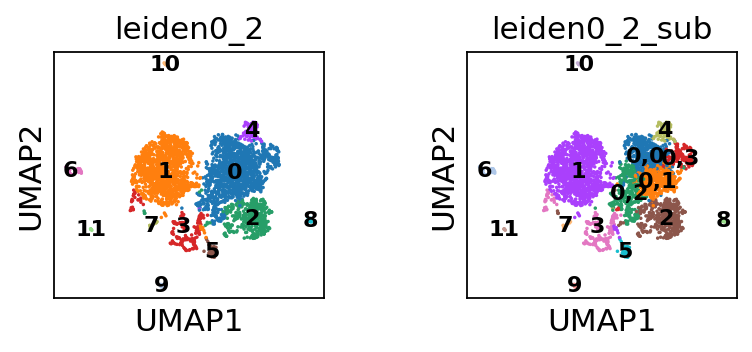

In [40]:
'''
Resolution = 0.2 worked. Apply to adata
'''
sc.tl.leiden(adata, restrict_to=('leiden0_2', ['0']), resolution=0.2, key_added='leiden0_2_sub')

rcParams["figure.facecolor"]='white'
rcParams['figure.figsize'] = 2,2
sc.pl.umap(adata, color=['leiden0_2','leiden0_2_sub'], hspace=0.5, legend_fontsize=10,
legend_loc='on data', size=10, frameon=True, show=False) 

In [7]:
# Crate a cell annotations column in adata.obs
adata.obs['cell_annotations'] = adata.obs['leiden0_2_sub']

# rename leiden sub clusters with a more logical numerical order
new_cluster_names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']

adata.rename_categories('cell_annotations', new_cluster_names)

In [9]:
# Count cells per cluster
adata.obs['cell_annotations'].value_counts()

4     1134
0      433
1      392
5      360
2      307
6      168
3      124
7       77
8       46
9       29
10      15
11      14
12      13
13       7
14       6
Name: cell_annotations, dtype: int64

In [10]:
##### Filter clusters with less than 50 cells
adata_subset = adata[adata.obs['cell_annotations'].isin(['0','1','2','3','4','5','6','7','8'])]

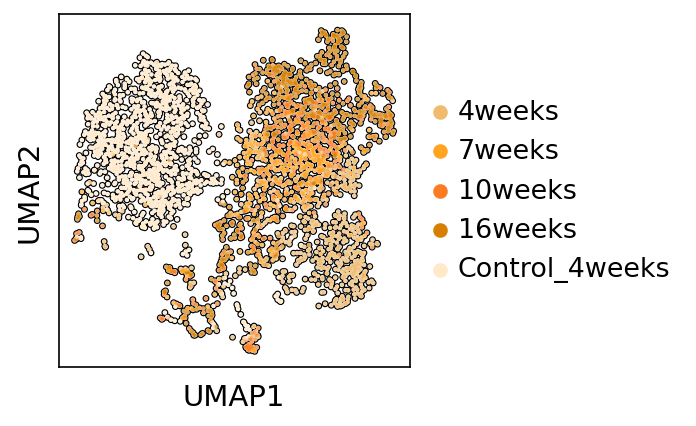

In [7]:
palette = ['#f0bb6e','#ffa521','#fc7c21','#d67f00','#ffe9c9']

rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=3,3
rcParams['figure.dpi']= 150
sc.pl.umap(adata_subset, color=['time_point'], wspace=0.6, frameon=True, legend_loc='right margin', add_outline=True, s=15, palette=palette, title='')

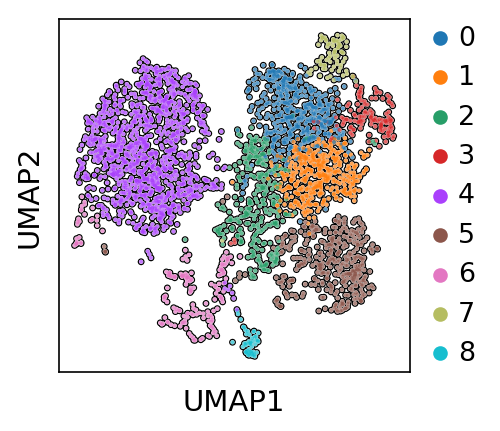

In [9]:
rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=3,3
rcParams['figure.dpi']= 150
sc.pl.umap(adata_subset, color=['cell_annotations'], wspace=0.6, frameon=True, legend_loc='right margin', add_outline=True, s=15, title='')

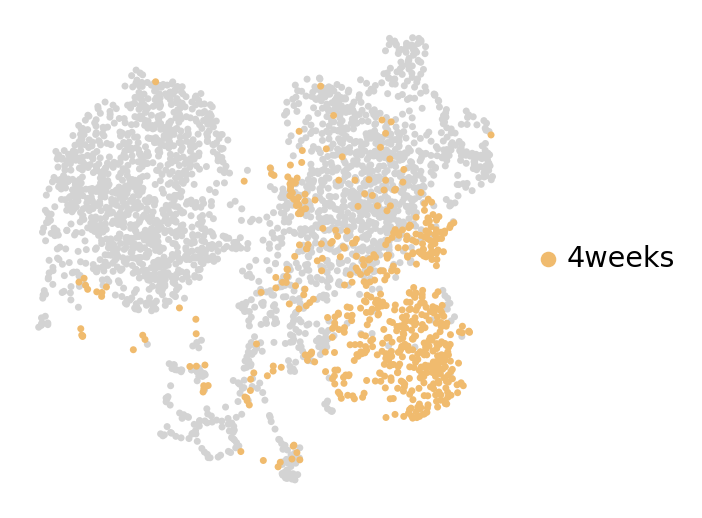

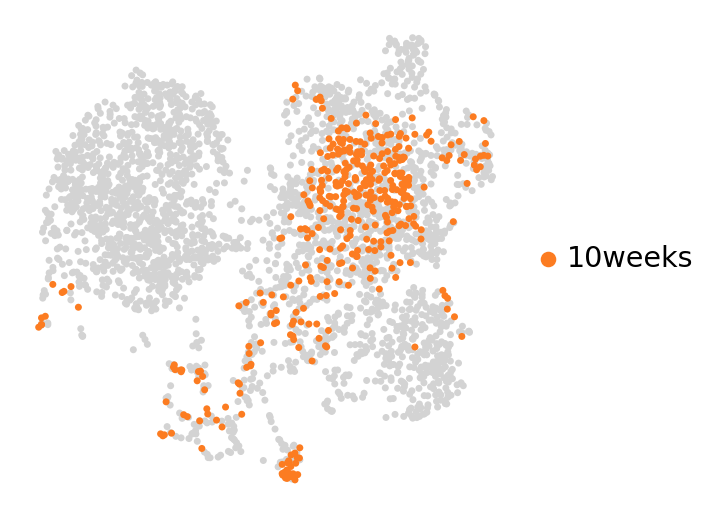

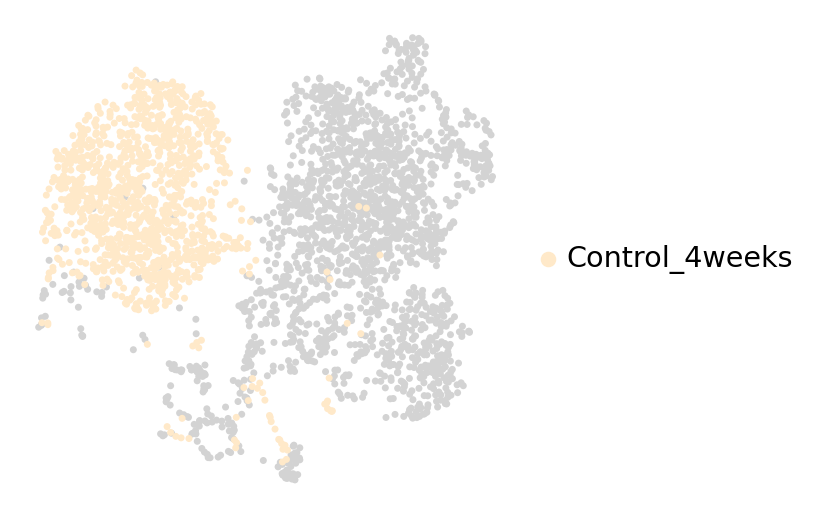

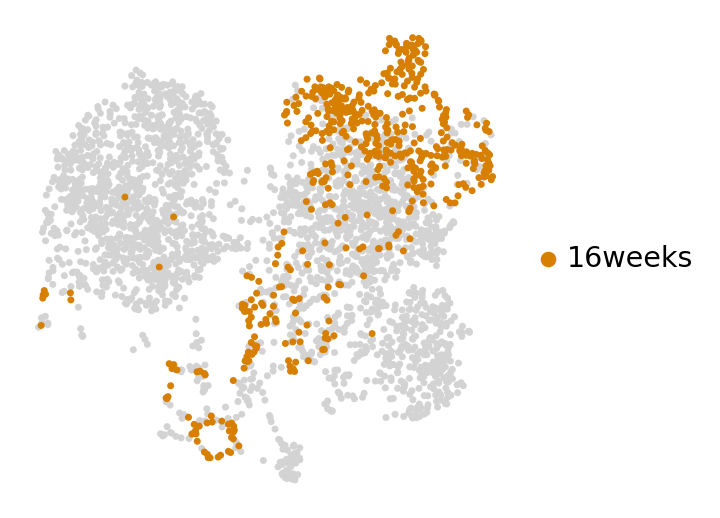

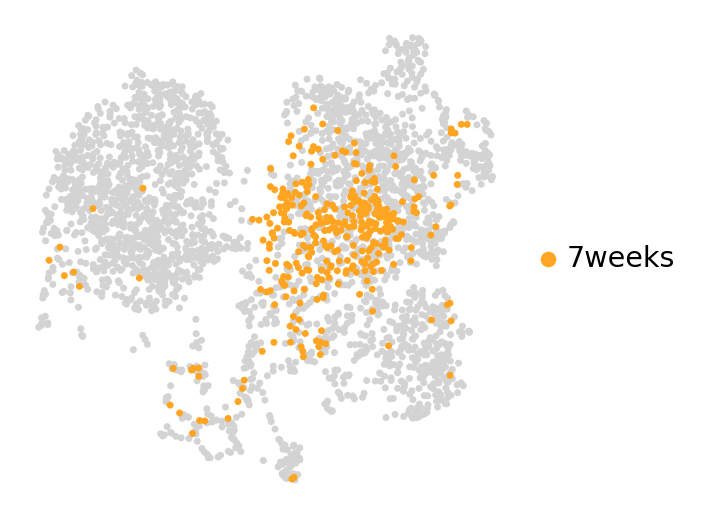

In [21]:
for i in list(set(adata_subset.obs['time_point'])):
    sc.pl.umap(adata_subset, color=['time_point'], groups = i, wspace=0.6, frameon=False, legend_loc='right margin', palette=palette, show=False)
    plt.title('')

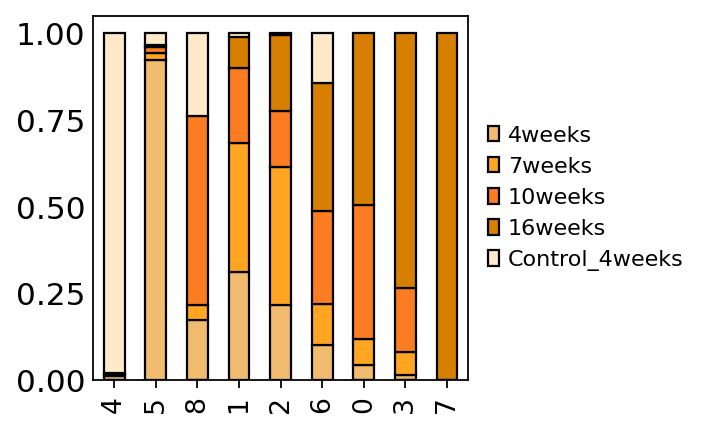

In [78]:
df=adata_subset.obs.copy()
df_plot = df.groupby(['cell_annotations', 'time_point']).size().reset_index().pivot(columns='time_point', index='cell_annotations', values=0)

# normalize rows
# Credit: https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value
df3 = df_plot.div(df_plot.sum(axis=1), axis=0)

# Manually order the rows according to time point contributions
df3 = df3.reindex(['4','5','8','1','2','6','0','3','7'])

# plot
color = ['#f0bb6e','#ffa521','#fc7c21','#d67f00','#ffe9c9']

rcParams['figure.figsize'] = 3,3
with axes_style({'axes.grid': False}):
    ax = df3.plot(kind='bar', stacked=True, edgecolor='black', color = color
                 )
    ax.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, frameon=False, title='', 
    title_fontsize=10, fontsize=10)
    ax.set_xlabel("", rotation=0, labelpad=10, fontsize=10)
    ax.set_ylabel("", rotation=90, labelpad=10, fontsize=10)
    #ax.set_yticklabels(, fontsize=10)
    ax.set_xticklabels(df3.index, fontsize=12)
    ax.tick_params(axis=u'y', which=u'both',length=0)

#### Perform differential expression analysis using KPY GEMM data. Use results as input for GeneWalk

In [18]:
# Perform DE analysis

ngenes = 3000
method = 'wilcoxon'
lst=['cell_annotations']
anndata = adata_subset

for resolution in lst:
    print(f'Performing DE analysis for resolution={resolution}...')
    sc.tl.rank_genes_groups(anndata, groupby=resolution, key_added=f'rank_genes_{resolution}',
    method = method, n_genes=ngenes)

    # save data to adata_subset.uns
    result = anndata.uns[f'rank_genes_{resolution}']
    groups = result['names'].dtype.names

de_data = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'pvals_adj','logfoldchanges']})

# Save DE results
result = anndata.uns['rank_genes_cell_annotations']
groups = result['names'].dtype.names
de_data = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'pvals_adj','logfoldchanges']})

de_data.to_excel("/n/data2/bch/hemonc/ckim/AARON/20190715_KPY_timecourse/data_analysis/mice/Differential Expression Results/KP_GEMM_raw.xlsx", sheet_name='Sheet1')

Performing DE analysis for resolution=cell_annotations...


In [7]:
# Add inputs for the function
resolution = 'cell_annotations'
anndata = adata_subset
pathways=[f'{resolution}'] 

# Load TF database
# http://bioinfo.life.hust.edu.cn/AnimalTFDB/#!/download
tfdb3_df = pd.read_csv('path/TFDB3_Mus_musculus_TF.csv', header=0)
# https://tools.sschmeier.com/tcof/browse/?type=tf&species=mouse
tfcofv2_df = pd.read_excel('path/murineTFcoFdBv2.xlsx', header=0)

# Keep tfs common in both datasets
tfcofv2_genes = set(tfcofv2_df['Symbol'].tolist())
tfdb3_genes = set(tfdb3_df['Symbol'].tolist())
merged_tf_list = list(set(tfcofv2_genes) & set(tfdb3_genes))
print('TFs in the TFDB v3 database:', len(tfdb3_genes))
print('TFs in the tfcof v2 database:', len(tfcofv2_genes))
print('TFs common in both databases:', len(merged_tf_list))

# import receptor and ligand data (Skelly et al Cell Reports, https://pubmed.ncbi.nlm.nih.gov/29346760/)
rec_lig_data = pd.read_excel('path/pinto_receptors_ligands.xlsx',
header=0)

# Create list of receptors
rec_list = list(set(rec_lig_data['receptor_symbol']))
lig_list = list(set(rec_lig_data['ligand_symbol']))

print('# receptors',len(rec_list))
print('# ligands',len(lig_list))

# Filter DE results for statistical significance, sort for log fold change, then annotate
cancer_df = anndata.copy()

df = pd.DataFrame(index=anndata.obs.index)

# create list of cluster names and sort numerically
clusters = list(set(anndata.obs[resolution]))
clusters.sort(key=int)

# Load DE data
result = anndata.uns[f'rank_genes_{resolution}']
groups = result['names'].dtype.names
de_data = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'pvals_adj','logfoldchanges']})

# find top sig genes
l = []
sig_genes = dict()
results_table = dict() #dict of results in table table format

for i in clusters:
    df1 = de_data.loc[(de_data[f'{i}_p'] < 0.05)] 
    df1 = df1[[f'{i}_n',f'{i}_p',f'{i}_l']]
    df1 = df1.sort_values(by=f'{i}_l', ascending=False) # sort by log fold value
    
    # annotate transcription factors, receptors, and ligands
    # Add columns. Default value == blank
    df1['TF'] = ' '
    df1['Receptors'] = ' '
    df1['Ligands'] = ' '
    
    # TFs
    for tf in merged_tf_list:
        df1.loc[df1[f'{i}_n'] == tf, 'TF'] = 'TRUE'
        
    # Receptors    
    for rec in rec_list:
        df1.loc[df1[f'{i}_n'] == rec, 'Receptors'] = 'TRUE'
        
    # Ligands    
    for lig in lig_list:
        df1.loc[df1[f'{i}_n'] == lig, 'Ligands'] = 'TRUE'
    
    results_table.update({f'Cluster {i}': df1}) # add cluster specific result to dict of results
    
    # turn results for all genes into a list for visualization
    top = df1[f'{i}_n'].tolist()
    sig_genes.update({f'Cluster {i} genes': top})
    print(f'Total genes in cluster{i} with pval<0.05', len(top))
    top_DE = top[:3]
    print(f'Top cluster {i} genes:', top_DE) # show top genes for each cluster after filtering
    l.append(top_DE) # make top gene tuple

# Merge top gene tuple into a single list
top_de_genes = []
for sublist in l:
    for item in sublist:
        top_de_genes.append(item)

print(f'Total genes in datasets with pval<0.05', len(top_de_genes)) 

# Export annotated results to excel

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(
'saved/file/path/file.xlsx', 
engine='xlsxwriter'
)  

for k,v in results_table.items():
    print(f'Adding {k} df to excel file')
    v.to_excel(writer, sheet_name=f'{k}')
    
writer.save()

TFs in the TFDB v3 database: 1623
TFs in the tfcof v2 database: 1507
TFs common in both databases: 1297
# receptors 560
# ligands 575
Total genes in cluster0 with pval<0.05 2721
Top cluster 0 genes: ['Cys1', 'Camk2b', 'Lrg1']
Total genes in cluster1 with pval<0.05 1410
Top cluster 1 genes: ['Fosl1', 'Cyr61', 'Thbs1']
Total genes in cluster2 with pval<0.05 2709
Top cluster 2 genes: ['Cdkn3', 'Pbk', 'Sapcd2']
Total genes in cluster3 with pval<0.05 3000
Top cluster 3 genes: ['Arhgap42', 'Parm1', 'Slc35f1']
Total genes in cluster4 with pval<0.05 1077
Top cluster 4 genes: ['Cabp2', 'Gm20186', 'Pon1']
Total genes in cluster5 with pval<0.05 3000
Top cluster 5 genes: ['Csprs', 'Tnfaip2', 'Tgtp2']
Total genes in cluster6 with pval<0.05 66
Top cluster 6 genes: ['Rtkn2', 'Gm26917', 'Hist4h4']
Total genes in cluster7 with pval<0.05 963
Top cluster 7 genes: ['Retnla', 'Corin', 'Apln']
Total genes in cluster8 with pval<0.05 171
Top cluster 8 genes: ['Milr1', 'Pcdhga8-1', 'Ccdc146']
Total genes in da

### Expression of injury genes in GEMM

True
Genes of interest: 10


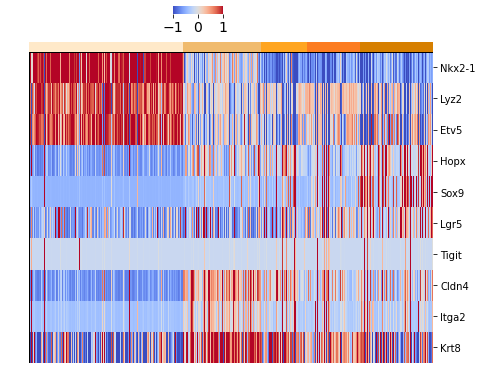

In [4]:
genes = ['Nkx2-1','Lyz2','Etv5','Hopx','Sox9','Lgr5','Tigit','Cldn4','Itga2','Krt8']

# Scale and create dataframe
scaled = sc.pp.scale(adata_subset, copy=True)
input_df = pd.DataFrame(data=scaled.X, index=scaled.obs_names, columns=scaled.var_names)

df = input_df.copy()

# QC
print(len(df.columns) == len(adata_subset.var_names))

# Add pathways 
pathways=['time_point'] 

for path in pathways:
    df[path]=scaled.obs[path]

# manually order the dataframe using a numeric strategy
input2 = df['time_point'].astype('object')
sorterIndex = {
    'Control_4weeks':'0',
    '4weeks':'1',
    '7weeks':'2',
    '10weeks':'3',
    '16weeks':'4' 
}
results = input2.map(sorterIndex)
df['order_results'] = results # creates row with numeric values that can be sorted
df = df.sort_values(['order_results'], ascending = True) # reorder the dataframe

# Color annotations

# time point colors
color_input = df['time_point'].astype('object')
lut = {
        'Control_4weeks':'#ffe9c9',
        '4weeks':'#f0bb6e',
        '7weeks':'#ffa521',
        '10weeks':'#fc7c21',
        '16weeks':'#d67f00'
       }

col_colors = color_input.map(lut)

# Remove columns that are not gene expression
df_input = df.drop(['time_point','order_results'], axis=1)
df_input = df_input.T # makes cells columns

df1 = df_input.loc[genes] # keep alw target genes only
print('Genes of interest:', len(df1.index))
#df1 = df1.apply(pd.to_numeric, errors='raise') # columns are objects for some reason. Need to convert to numeric

#df1 = df1.reindex(org_order) # reorder the index based in the alw organoid clustering

# Make clustermaps
vmin = -1
vmax = 1
base = 2
center = 0

# Plot
cmap = 'coolwarm'

g = sb.clustermap(
df1, vmin=vmin, vmax=vmax, center=center, cmap=cmap, metric="euclidean", row_cluster=False, col_cluster=False,
figsize=(7,len(df1.index)/base), cbar_pos=(0.35, 1.0, .1, .02), # locxaxis,locyaxis,cbarwidth,cbarheight
col_colors=[col_colors], yticklabels=True, xticklabels=False, cbar_kws={"orientation": "horizontal"},
dendrogram_ratio=0.05,
                   ) 
ax = g.ax_heatmap
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel("")
#ax.set_yticklabels()
#ax.set_yticks([])
ax.set_ylabel("", rotation=270, labelpad=25)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.axhline(y=0, color='black',linewidth=1)
ax.axhline(y=len(df1.index), color='black',linewidth=1)
ax.axvline(x=0, color='black',linewidth=1)
ax.axvline(x=4046, color='black',linewidth=1, linestyle='--')
ax.axvline(x=4046+19510, color='black',linewidth=1)
ax.axvline(x=len(df1.columns), color='black',linewidth=1)
plt.show()

<Figure size 1800x1200 with 0 Axes>

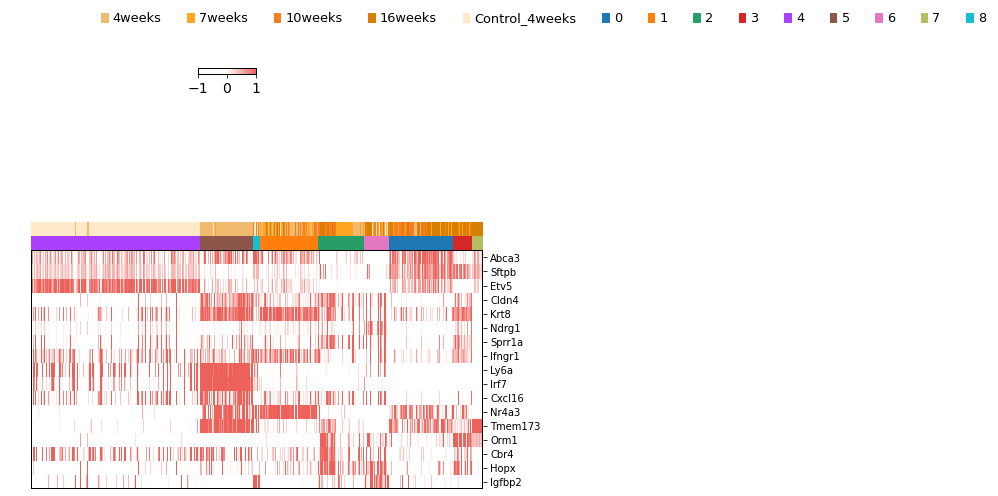

In [17]:
# copy data 
cancer_df = sc.pp.scale(adata_subset, copy=True)

df = pd.DataFrame(index=adata_subset.obs.index)

# Add col color annotations to the dataframe. Will also add an index. Two for one!
pathways=['cell_annotations','time_point'] 

genes = ['Abca3','Sftpb','Etv5','Cldn4', 'Krt8', 'Ndrg1', 'Sprr1a', 'Ifngr1', 'Ly6a', 'Irf7', 'Cxcl16', 'Nr4a3', 'Tmem173', 'Orm1', 'Cbr4','Hopx','Igfbp2']

# Add pathways first for index
for path in pathways:
    df[path]=cancer_df.obs[path]
 
for gene in genes:
    df[gene]=cancer_df[:, [gene]].to_df()

cols = pathways + genes
df = df[cols]

# order dataframe rows based on time point contribution
input2 = df['cell_annotations'].astype('object')
sorterIndex = {'4':'0',
               '5':'1',
               '8':'2',
               '1':'3',
               '2':'4',
               '6':'5',
               '0':'6',
               '3':'7',
               '7':'8'}
results = input2.map(sorterIndex)
df['order_results'] = results
df = df.sort_values(['order_results'], ascending = True) # reorder the dataframe

# Color annotations
color_input = df['time_point'].astype('object')
lut = {'4weeks':'#f0bb6e','7weeks':'#ffa521','10weeks':'#fc7c21','16weeks':'#d67f00','Control_4weeks':'#ffe9c9'}
col_colors = color_input.map(lut)

color_input2 = df['cell_annotations'].astype('object')
lut2 = dict(zip(sorted(color_input2.unique()), adata_subset.uns['cell_annotations_colors'])) 
col_colors2 = color_input2.map(lut2)

# Remove columns that are not gene expression
df = df.drop(['cell_annotations','time_point','order_results'], axis=1)
df = df.T # makes cells columns

# Plot
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sb
import matplotlib.patches as mpatches

vmin = -1  # expression
vmax = 1  # expression
base = 4 # for plot size, not expression

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['white', 'white', '#EC625B'])

plt.figure(dpi=300)

g1 = sb.clustermap(
    df, vmin=vmin, vmax=vmax, center=0,
    cmap=cmap, metric="euclidean", row_cluster=False, col_cluster=False,
    figsize=(8, len(df.index) / base), cbar_pos=(0.35, 1.4, .1, .02),  # locxaxis,locyaxis,cbarwidth,cbarheight
    col_colors=[col_colors, col_colors2], yticklabels=True, xticklabels=False,
    cbar_kws={"orientation": "horizontal"},
    dendrogram_ratio=0.05, colors_ratio=0.05
)

ax = g1.ax_heatmap
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("", rotation=270, labelpad=25)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.axhline(y=0, color='black', linewidth=2)  # border
ax.axhline(y=len(df.index), color='black', linewidth=2)  # border
ax.axvline(x=0, color='black', linewidth=2)  # border
ax.axvline(x=len(df.columns), color='black', linewidth=2)  # border

# Create a list to collect the patches
patches = []

# Create a patch for every color
for key in lut.keys():
    patches.append(mpatches.Patch(color=lut[key], label=key))

# Add patches for col_colors2
for key in lut2.keys():
    patches.append(mpatches.Patch(color=lut2[key], label=key))
    
# Add legends for col_colors and col_colors2
plt.legend(handles=patches, bbox_to_anchor=(1, 1, 10, 10), loc='upper center', ncol=len(patches), borderaxespad=0, frameon=False)

# Get the colorbar axes
cbar_ax = g1.cax

# Add a border around the colorbar
cbar_ax.spines['top'].set_visible(True)
cbar_ax.spines['bottom'].set_visible(True)
cbar_ax.spines['left'].set_visible(True)
cbar_ax.spines['right'].set_visible(True)
cbar_ax.spines['top'].set_linewidth(1)
cbar_ax.spines['bottom'].set_linewidth(1)
cbar_ax.spines['left'].set_linewidth(1)
cbar_ax.spines['right'].set_linewidth(1)


### AT2 and injury/plasticity signature score calculations

#### Subset middle and late time points

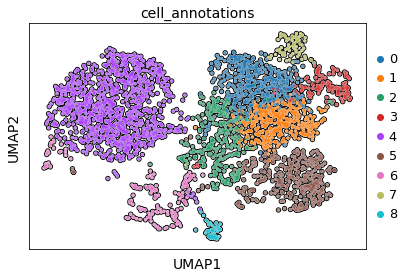

In [4]:
# QC
rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=6,4
sc.pl.umap(adata_subset, color='cell_annotations', add_outline=True)

In [5]:
earlymiddle_subset = adata_subset[adata_subset.obs['cell_annotations'].isin(['4','5','6','0'])]
middle_subset = adata_subset[adata_subset.obs['cell_annotations'].isin(['1','2','6','0'])]
late_subset = adata_subset[adata_subset.obs['cell_annotations'].isin(['3','7'])]

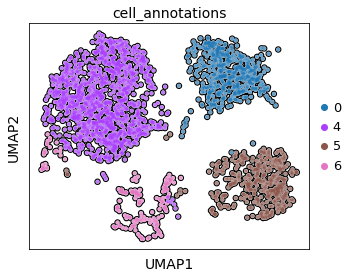

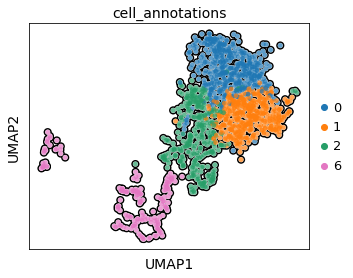

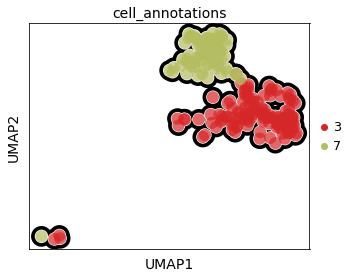

In [6]:
# QC
rcParams['figure.facecolor']='white'
rcParams['figure.figsize']=5,4
sc.pl.umap(earlymiddle_subset, color='cell_annotations', add_outline=True)
sc.pl.umap(middle_subset, color='cell_annotations', add_outline=True)
sc.pl.umap(late_subset, color='cell_annotations', add_outline=True)

In [7]:
# create dict
marker_dict={
    'AT2 signature':['Etv5','Lyz2','Abca3'],
    'Injury/plasticity signature':['Cldn4','Krt8','Nr4a3','Ifngr1','Ndrg1','Sox9','Hmga2','Itga2']        
            }

In [8]:
# QC
print('Number of genes in each signature')
for k,v in marker_dict.items():
    print(f'{k}:', len(v))

# Defined a signature score function

def evaluate_partition(anndata, marker_dict, gene_symbol_key=None, partition_key=None):    
    
    print('Number of cells to calculate scores for:', len(anndata.obs.index))
  
    #Test inputs
    if partition_key not in anndata.obs.columns.values:
        print('KeyError: The partition key was not found in the passed AnnData object.')
        print('   Have you done the clustering? If so, please tell pass the cluster IDs with the AnnData object!')
        raise

    if (gene_symbol_key != None) and (gene_symbol_key not in anndata.var.columns.values):
        print('KeyError: The provided gene symbol key was not found in the passed AnnData object.')
        print('   Check that your cell type markers are given in a format that your anndata object knows!')
        raise
        
    if gene_symbol_key:
        gene_ids = anndata.var[gene_symbol_key]
    else:
        gene_ids = anndata.var_names
           
    # I created a column based on index. This allows z-score calculation on single cells rather than clusters
    clusters = np.unique(anndata.obs[partition_key])
    n_clust = len(clusters)
    n_groups = len(marker_dict)
    
    marker_res = np.zeros((n_groups, n_clust))
    z_scores = sc.pp.scale(anndata, copy=True)

    i = 0
    for group in marker_dict:
        start = time.time()
        print(f'Calculating score for {group}')
        # Find the corresponding columns and get their mean expression in the cluster
        j = 0
        for clust in clusters:
            cluster_cells = np.in1d(z_scores.obs[partition_key], clust)
            marker_genes = np.in1d(gene_ids, marker_dict[group])
            marker_res[i,j] = z_scores.X[np.ix_(cluster_cells,marker_genes)].mean()
            j += 1
        i+=1
        end = time.time()
        print(f'Time to calculate signature score for {group} (min):', (end - start)/60)
    
    variances = np.nanvar(marker_res, axis=0)
    if np.all(np.isnan(variances)):
        print("No variances could be computed, check if your cell markers are in the data set.")
        print("Maybe the cell marker IDs do not correspond to your gene_symbol_key input or the var_names")
        raise
    
    print('Creating dataframe with signature results')
    
    marker_res_df = pd.DataFrame(marker_res, columns=clusters, index=marker_dict.keys())
    
    return marker_res_df


Number of genes in each signature
AT2 signature: 3
Injury/plasticity signature: 8


In [9]:
# Calculate the z-score
import time

# populations to calculate scores
pops = [earlymiddle_subset, middle_subset, late_subset]

for pop in pops:
    start = time.time()
    
    df = evaluate_partition(pop, marker_dict, gene_symbol_key=None, partition_key = 'cell_barcodes')
    
    # Transpose the dataframe
    df_transposed = df.transpose()
    
    print('Adding signature to adata.obs')
    for i in df_transposed.columns:
        pop.obs[f'{i}'] = df_transposed[f'{i}']
        
    end = time.time()
    print(f'Done. Total time to calculate signature scores of {len(df_transposed.columns)} clusters (min):', (end - start)/60)

Number of cells to calculate scores for: 2095
Calculating score for AT2 signature
Time to calculate signature score for AT2 signature (min): 0.02963343063990275
Calculating score for Injury/plasticity signature
Time to calculate signature score for Injury/plasticity signature (min): 0.07019097805023193
Creating dataframe with signature results
Adding signature to adata.obs


<ipython-input-9-459792d0392d>:17: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  pop.obs[f'{i}'] = df_transposed[f'{i}']


Done. Total time to calculate signature scores of 2 clusters (min): 0.12005175352096557
Number of cells to calculate scores for: 1300
Calculating score for AT2 signature
Time to calculate signature score for AT2 signature (min): 0.017412090301513673
Calculating score for Injury/plasticity signature
Time to calculate signature score for Injury/plasticity signature (min): 0.044388469060262045
Creating dataframe with signature results
Adding signature to adata.obs


<ipython-input-9-459792d0392d>:17: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  pop.obs[f'{i}'] = df_transposed[f'{i}']


Done. Total time to calculate signature scores of 2 clusters (min): 0.07342276175816854
Number of cells to calculate scores for: 201
Calculating score for AT2 signature
Time to calculate signature score for AT2 signature (min): 0.002724456787109375
Calculating score for Injury/plasticity signature
Time to calculate signature score for Injury/plasticity signature (min): 0.006817181905110677
Creating dataframe with signature results
Adding signature to adata.obs
Done. Total time to calculate signature scores of 2 clusters (min): 0.012532512346903482


<ipython-input-9-459792d0392d>:17: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  pop.obs[f'{i}'] = df_transposed[f'{i}']


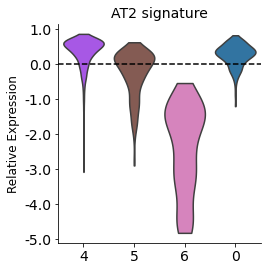

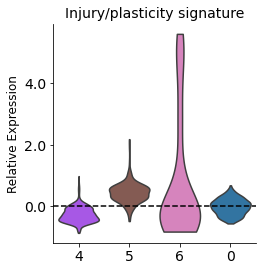

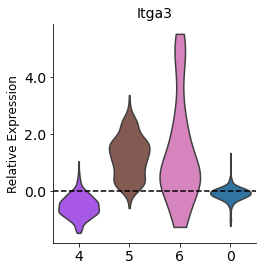

In [10]:
# Plot

order = ['4','5','6','0']

lst = ['AT2 signature','Injury/plasticity signature','Itga3']

scaled = sc.pp.scale(earlymiddle_subset, copy=True)

for i in lst:
    rcParams['figure.figsize']=4,4
    rcParams['figure.facecolor']='white'
    with axes_style({'axes.grid': False}):
        ax=sc.pl.violin(scaled, i, groupby='cell_annotations', use_raw=False, stripplot=False, jitter=False,
        order=order,show=False) 
        despine(right=True)
        plt.title(i)
        plt.ylabel('Relative Expression', fontsize=12)
        plt.xlabel('')
        plt.axhline(0, linestyle='--', color='black')
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        #ax.set_ylim(-2,2)

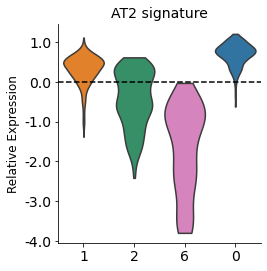

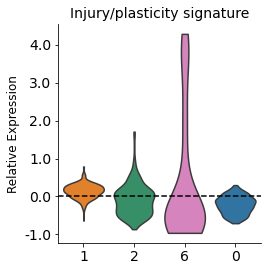

In [12]:
# Plot

order = ['1','2','6','0']

lst = ['AT2 signature','Injury/plasticity signature']

for i in lst:
    rcParams['figure.figsize']=4,4
    rcParams['figure.facecolor']='white'
    with axes_style({'axes.grid': False}):
        ax=sc.pl.violin(middle_subset, i, groupby='cell_annotations', use_raw=False, stripplot=False, jitter=False,
        order=order,show=False) 
        despine(right=True)
        plt.title(i)
        plt.ylabel('Relative Expression', fontsize=12)
        plt.xlabel('')
        plt.axhline(0, linestyle='--', color='black')
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        #ax.set_ylim(-2,2)

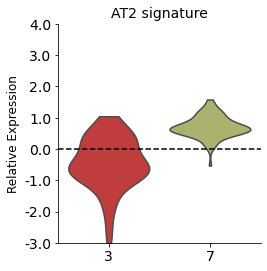

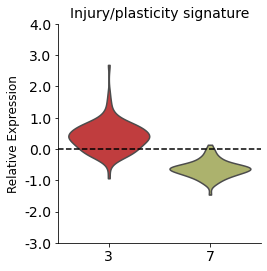

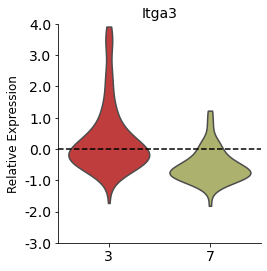

In [13]:
# Plot

order = ['3','7']

lst = ['AT2 signature','Injury/plasticity signature','Itga3']

scaled = sc.pp.scale(late_subset, copy=True)

for i in lst:
    rcParams['figure.figsize']=4,4
    rcParams['figure.facecolor']='white'
    with axes_style({'axes.grid': False}):
        ax=sc.pl.violin(scaled, i, groupby='cell_annotations', use_raw=False, stripplot=False, jitter=False,
        order=order,show=False) 
        despine(right=True)
        plt.title(i)
        plt.ylabel('Relative Expression', fontsize=12)
        plt.xlabel('')
        plt.axhline(0, linestyle='--', color='black')
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.set_ylim(-3,4)